<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="homework.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Take-Home <br>(Day 1)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

#### Import the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import accuracy_score,f1_score
from sklearn.feature_selection import RFE
from warnings import filterwarnings
filterwarnings('ignore')
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.colors import ListedColormap

#### Read the data

Load the csv file and print the first five observations.

In [2]:
df=pd.read_csv('bank_churn.csv')
df.head()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0


In [3]:
df.shape

(9920, 9)

In [4]:
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
Closed_Acc            int64
dtype: object

In [5]:
df['NumOfProducts'].value_counts()

1    5043
2    4556
3     262
4      59
Name: NumOfProducts, dtype: int64

In [6]:
df['HasCrCard'].value_counts()

1    7002
0    2918
Name: HasCrCard, dtype: int64

In [7]:
df['NumOfProducts'] = df['NumOfProducts'].astype(object)
df['HasCrCard'] = df['HasCrCard'].astype(object)

In [8]:
df.isnull().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

In [9]:
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts        object
HasCrCard            object
Closed_Acc            int64
dtype: object

In [10]:
df['Geography'].value_counts()

France     4972
Germany    2491
Spain      2457
Name: Geography, dtype: int64

Our objective is to predict whether the customer has closed the bank account or not.

**The data definition is as follows:** <br>

**CreditScore**: Credit score of the customer 

**Geography**: Resident country of the customer

**Gender**: Gender of the customer

**Age**: Age of the customer

**NumOfYrsWithBank**: Years for which the customer has been with the bank

**Balance**: Bank balance of the customer in Euro

**NumOfProducts**: Number of bank facilities for which customer has opted

**HasCrCard**: Whether the customer has credit card or not (1 = Yes, 0 = No)

**Closed_Acc**: Whether the customer has closed the bank account or not (1 = Yes, 0 = No) (target/dependent variable)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Is the target variable imbalanced? </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [11]:
df['Closed_Acc'].value_counts()

0    7898
1    2022
Name: Closed_Acc, dtype: int64

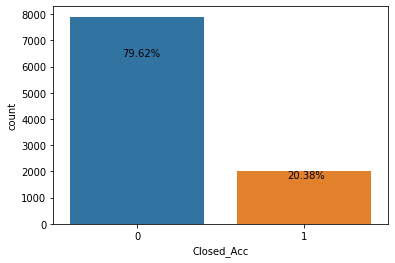

In [12]:
sns.countplot(data=df,x='Closed_Acc')
plt.text(x = -0.09, y = df['Closed_Acc'].value_counts()[0] - 1500, s = str(round((df['Closed_Acc'].value_counts()[0])*100/len(df['Closed_Acc']),2)) + '%')
plt.text(x = 0.90, y = df['Closed_Acc'].value_counts()[1] - 300, s = str(round((df['Closed_Acc'].value_counts()[1])*100/len(df['Closed_Acc']),2)) + '%')
plt.show()

In [13]:
# Imbalance data

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Build a full logistic model and calculate the odds for each variable (consider the probability  threshold as 0.25)</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [14]:
df_num=df.select_dtypes(include=np.number).drop(['Closed_Acc'],axis=1)
num_scaled=df_num.apply(lambda rec:rec-rec.mean()/rec.std(),axis=0)
df_num = pd.DataFrame(num_scaled, columns = df_num.columns)
df_cat=df.select_dtypes(include='object')
df_cat=pd.get_dummies(df_cat,drop_first=True)
X=pd.concat([df_num,df_cat],axis=1)
y = df.Closed_Acc
Xc = sm.add_constant(X)
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(Xc, y, random_state = 1, test_size = 0.2)
logreg_full = sm.Logit(y_train_full, X_train_full).fit()
print(logreg_full.summary())

         Current function value: 0.384626
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7924
Method:                           MLE   Df Model:                           11
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.2374
Time:                        19:22:09   Log-Likelihood:                -3052.4
converged:                      False   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.0032      0.266    -11.301      0.000      -3.524      -2.482
CreditScore          -0.0007      0.000     

In [15]:
y_pred_prob = logreg_full.predict(X_test_full)
y_pred = [ 0 if x < 0.25 else 1 for x in y_pred_prob]
print(y_pred[:5])
df_odds = pd.DataFrame(np.exp(logreg_full.params), columns= ['Odds']) 
df_odds

[0, 1, 0, 0, 0]


,Odds
const,4.962912e-02
CreditScore,9.993475e-01
Age,1.071856e+00
NumOfYrsWithBank,9.941601e-01
Balance,9.999995e-01
Geography_Germany,2.523942e+00
Geography_Spain,9.929925e-01
Gender_Male,5.871105e-01
NumOfProducts_2,2.132096e-01
NumOfProducts_3,1.143073e+01


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Calculate the Specificity and Sensitivity from the confusion matrix of the full model (consider the probability threshold as 0.25)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [16]:
cm=confusion_matrix(y_test_full,y_pred)
total=cm[0][0]+cm[1][0]+cm[1][1]+cm[0][1]

sensitivity = (cm[1][1])/(cm[1][1]+cm[1][0])
print("Sensitivity =",round(sensitivity,2))

specificity = (cm[0][0])/(cm[0][0]+cm[0][1])
print("Specificity =",round(specificity,2))

Sensitivity = 0.67
Specificity = 0.83


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a logistic model on the 6 features obtained by RFE and plot the ROC curve 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [17]:
logreg = LogisticRegression()
rfe_model = RFE(estimator = logreg, n_features_to_select = 6)
rfe_model = rfe_model.fit(X_train_full, y_train_full)
feat_index = pd.Series(data = rfe_model.ranking_, index = X_train_full.columns)
signi_feat_rfe = feat_index[feat_index==1].index
print(signi_feat_rfe)

Index(['Age', 'Geography_Germany', 'Gender_Male', 'NumOfProducts_2',
       'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')


In [18]:
logreg_rfe = sm.Logit(y_train_full, X_train_full[['const', 'Geography_Germany', 'Gender_Male', 'NumOfProducts_2','NumOfProducts_3', 'NumOfProducts_4']]).fit()
print(logreg_rfe.summary())

         Current function value: 0.418922
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:             Closed_Acc   No. Observations:                 7936
Model:                          Logit   Df Residuals:                     7930
Method:                           MLE   Df Model:                            5
Date:                Sat, 20 Nov 2021   Pseudo R-squ.:                  0.1694
Time:                        19:22:10   Log-Likelihood:                -3324.6
converged:                      False   LL-Null:                       -4002.6
Covariance Type:            nonrobust   LLR p-value:                4.563e-291
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.9625      0.052    -18.529      0.000      -1.064      -0.861
Geography_Germany     0.8908      0.065     

In [19]:
probas_ = logreg.fit(X_train_full[['const', 'Geography_Germany', 'Gender_Male', 'NumOfProducts_2','NumOfProducts_3', 'NumOfProducts_4']], y_train_full).predict_proba(X_test_full[['const', 'Geography_Germany', 'Gender_Male', 'NumOfProducts_2','NumOfProducts_3', 'NumOfProducts_4']])
fpr, tpr, thresholds = roc_curve(y_test_full, probas_[:, 1])
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

Area under the ROC curve : 0.769562


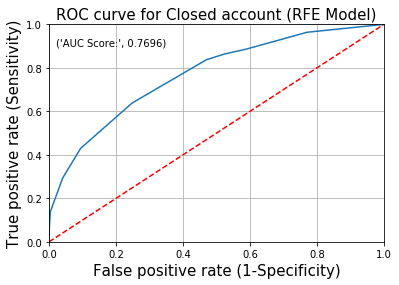

In [20]:

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Closed account (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc,4)))

plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Obtain the optimal value of cut-off probability for the full model using the Youden's index 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [21]:
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.638350,0.248092,0.277773,0.390258
1,0.837379,0.470102,0.184738,0.367277
2,0.864078,0.524809,0.168266,0.339269
3,0.429612,0.094148,0.354127,0.335464
4,0.885922,0.588422,0.106500,0.297500


As we can see that the optimal cut-off probability is approximately 0.28, As the difference of tpr and fpr is maximum.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Consider the cut-off probability obtained from Youden's index for the full model and calculate the following measures:<br>
                    a. f-1 score <br>
                    b. Accuracy<br>
                    c. Kappa Score
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

Let us consider this cut-off to predict the target values. i.e. if 'y_pred_prob' is less than 0.28 , 
then consider it to be 0 else consider it to be 1.

In [22]:
y_pred_youden = [ 0 if x < 0.28 else 1 for x in y_pred_prob]

In [23]:
accuracy = accuracy_score(y_test_full, y_pred_youden)
print('accuracy :',accuracy)
kappa = cohen_kappa_score(y_test_full, y_pred_youden)
print('kappa value:',kappa)

accuracy : 0.8140120967741935
kappa value: 0.463181420886837


In [24]:
print(classification_report(y_test_full, y_pred_youden))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1572
           1       0.55      0.62      0.58       412

    accuracy                           0.81      1984
   macro avg       0.72      0.74      0.73      1984
weighted avg       0.82      0.81      0.82      1984



f1_score = [0.88 , 0.58]

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Identify the variables involved in multicollinearity 
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

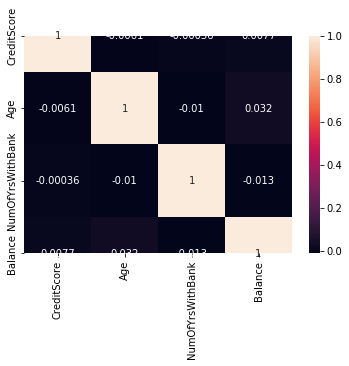

In [25]:
sns.heatmap(df_num.corr(),annot=True)

In [26]:
X_cpy=X.copy()
vif=pd.DataFrame()
vif['Features']=X_cpy.columns
vif['VIF']=[variance_inflation_factor(X_cpy.values,i) for i in range(X_cpy.shape[1])] # X.shape[1] or X.columns
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,CreditScore,15.729928
1,Age,10.594161
3,Balance,3.366615
10,HasCrCard_1,3.272950
2,NumOfYrsWithBank,2.244012
6,Gender_Male,2.167499
7,NumOfProducts_2,2.154548
4,Geography_Germany,1.791178
5,Geography_Spain,1.485373
8,NumOfProducts_3,1.064438


In [27]:
X_cpy.drop('CreditScore',axis=1,inplace=True)

In [28]:
vif=pd.DataFrame()
vif['Features']=X_cpy.columns
vif['VIF']=[variance_inflation_factor(X_cpy.values,i) for i in range(X_cpy.shape[1])] # X.shape[1] or X.columns
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Age,5.813932
2,Balance,3.075260
9,HasCrCard_1,3.030688
1,NumOfYrsWithBank,2.164334
5,Gender_Male,2.090865
6,NumOfProducts_2,1.930364
3,Geography_Germany,1.791169
4,Geography_Spain,1.459793
7,NumOfProducts_3,1.062450
8,NumOfProducts_4,1.015808


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Build a logistic regression model using the categorical variables and the variables obtained after calculating VIF. Also, plot the ROC curve and compute the AUC score (consider the cut-off probability as 0.6)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_cpy, y, random_state = 1, test_size = 0.3)
model=logreg.fit(X_train,y_train)

Area under the ROC curve : 0.500000


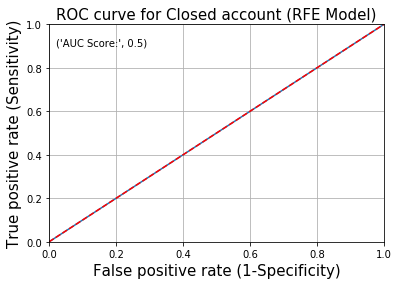

In [30]:
y_pred_prob=model.predict_proba(X_test)

y_pred=[ 0 if x < 0.6 else 1 for x in y_pred_prob[:,1]]

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Closed account (RFE Model)', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc,4)))
plt.grid(True)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Consider the costs of false negatives and false positives as 2 and 0.5 respectively to obtain the optimal cut-off probability for which the total cost will be minimum
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [31]:
def plot_confusion_matrix(model, test_data):
    y_pred = model.predict(test_data)
    cm = confusion_matrix(y_test, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()

def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    
    cm = confusion_matrix(actual_value, predicted_value)           
    
    
    cm_array = np.array(cm)
    
    
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

i = 0

for cut_off in range(10, 100):
    total_cost = calculate_total_cost(y_test,  pd.Series(y_pred_prob[:,1]).map(lambda x: 1 if x > (cut_off/100) else 0), 2, 0.5) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    
    i += 1

In [32]:
df_total_cost.sort_values('total_cost', ascending = True).head(10)

,cut-off,total_cost
1,0.11,1182.5
3,0.13,1182.5
0,0.10,1184.0
2,0.12,1184.0
4,0.14,1208.0
65,0.75,1214.0
64,0.74,1214.0
63,0.73,1214.0
62,0.72,1214.0
61,0.71,1214.0


From the above output we can see that, the 'total_cost' is same for the cut-off probability values 0.75 ,0.74 ,0.73 ,0.72 ,0.71. Thus, we can consider any of these value as the cut-off probability.

Here, we are considering the cut-off value as 0.75 i.e. if 'y_pred_prob' is less than 0.75, then consider it to be 0 else consider it to be 1.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Build a full logistic model using the optimal cut-off probability obtained in Q9. Also, plot the confusion matrix and ROC curve along with the AUC score  
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

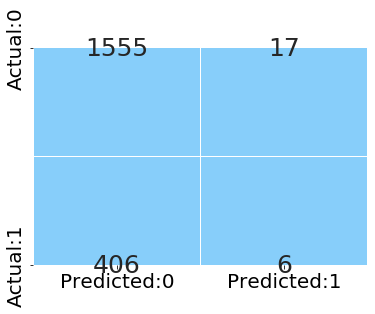

Area under the ROC curve : 0.500000


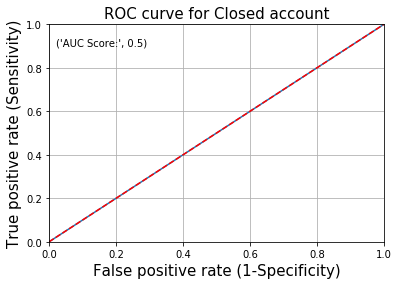

In [33]:
model_full1=logreg.fit(X_train_full,y_train_full)
y_pred_proba=model_full1.predict_proba(X_test_full)

y_pred=[ 0 if x < 0.75 else 1 for x in y_pred_proba[:,1]]



def plot_confusion_matrix(model):
    y_pred_proba=model.predict_proba(X_test_full)
    y_pred=[ 0 if x < 0.6 else 1 for x in y_pred_proba[:,1]]
    cm = confusion_matrix(y_test_full, y_pred)
    conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
    sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
                linewidths = 0.1, annot_kws = {'size':25})
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.show()
    
plot_confusion_matrix(model_full1)

fpr, tpr, thresholds = roc_curve(y_test_full, y_pred)
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot([0, 1], [0, 1],'r--')
plt.title('ROC curve for Closed account', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(roc_auc,4)))
plt.grid(True)